# NCEAS PHATE Benchmark Demo

This notebook verifies that the project environment is installed correctly.

It demonstrates:
- PHATE
- PCA
- UMAP
- HDBSCAN
- Visualization output

# Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import umap
import phate
import hdbscan

print("All packages imported successfully.")

All packages imported successfully.


# Generate Example Data

In [2]:
np.random.seed(42)

# Generate synthetic embedding-like data
data = np.random.normal(0, 1, (300, 50))

print("Synthetic dataset shape:", data.shape)

Synthetic dataset shape: (300, 50)


# Dimensionality Reduction

In [3]:
# PHATE
phate_operator = phate.PHATE(n_components=2, random_state=42)
phate_embedding = phate_operator.fit_transform(data)

# PCA
pca = PCA(n_components=2)
pca_embedding = pca.fit_transform(data)

# UMAP
umap_model = umap.UMAP(n_components=2, random_state=42)
umap_embedding = umap_model.fit_transform(data)

Calculating PHATE...
  Running PHATE on 300 observations and 50 variables.
  Calculating graph and diffusion operator...
    Calculating KNN search...
    Calculated KNN search in 0.16 seconds.
    Calculating affinities...
    Calculated affinities in 0.83 seconds.
  Calculated graph and diffusion operator in 1.02 seconds.
  Calculating optimal t...
    Automatically selected t = 11
  Calculated optimal t in 0.39 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 0.01 seconds.
  Calculating metric MDS...
    SGD-MDS may not have converged: stress changed by -3.2% in final iterations. Consider increasing n_iter or adjusting learning_rate.
  Calculated metric MDS in 0.41 seconds.
Calculated PHATE in 1.84 seconds.


/opt/anaconda3/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


# Clustering

In [4]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=10)
labels = clusterer.fit_predict(phate_embedding)

print("Number of clusters found:", len(set(labels)))

Number of clusters found: 1


/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


# Visualization

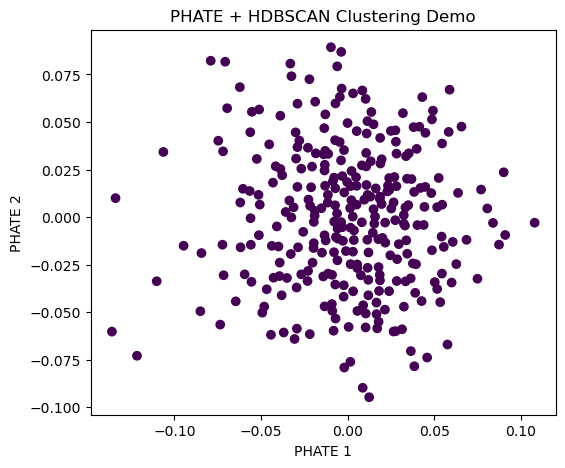

In [5]:
plt.figure(figsize=(6,5))
plt.scatter(phate_embedding[:, 0], phate_embedding[:, 1], c=labels, cmap='viridis')
plt.title("PHATE + HDBSCAN Clustering Demo")
plt.xlabel("PHATE 1")
plt.ylabel("PHATE 2")
plt.show()